In [22]:
import matplotlib.pyplot as plt

from fitness_observer import FitnessObserver
from labs_simulation import run_genetic_algorithm

In [23]:
iterations_number = 100
iterations = [i for i in range(iterations_number)]

## Base algorithm

In [24]:
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm

In [25]:
base_fitness_observer = FitnessObserver()
run_genetic_algorithm(GeneticAlgorithm, 0.5, observers=[base_fitness_observer])

[2024-05-31 18:37:40,345] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-31 18:37:40,353] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-31 18:37:40,374] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-31 18:37:40,375] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-31 18:37:42,735] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: Genetic algorithm
Fitness: 2578
Computing time: 2.3907101154327393


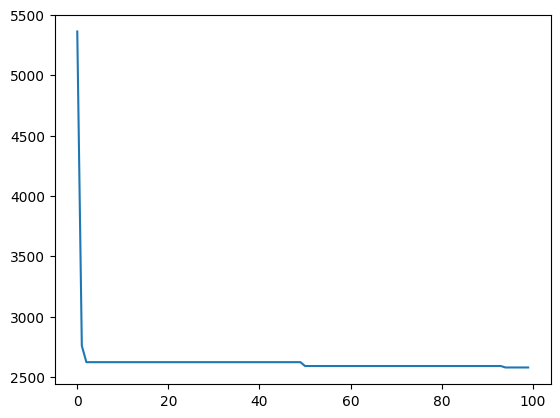

In [26]:
base_fitness = base_fitness_observer.fitness
plt.plot(iterations, base_fitness)
plt.show()

## Follow Best

In [27]:
from follow_best import FollowBestGA

In [28]:
follow_best_fitness_observer = FitnessObserver()
run_genetic_algorithm(FollowBestGA, 0.5, observers=[follow_best_fitness_observer])

[2024-05-31 18:37:42,832] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-31 18:37:42,836] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-31 18:37:42,856] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-31 18:37:42,856] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-31 18:37:45,309] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Follow Best' mutation
Fitness: 2218
Computing time: 2.477858066558838


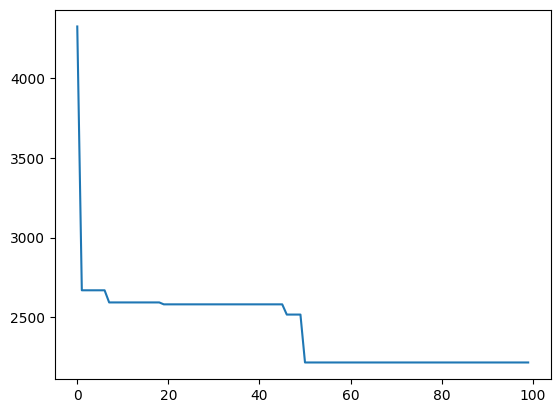

In [29]:
follow_best_fitness = follow_best_fitness_observer.fitness
plt.plot(iterations, follow_best_fitness)
plt.show()

## Follow Best Distinct

In [30]:
from follow_best_distinct import FollowBestDistinctGA

In [31]:
follow_best_distinct_fitness_observer = FitnessObserver()
run_genetic_algorithm(FollowBestDistinctGA, 0.5, observers=[follow_best_distinct_fitness_observer])

[2024-05-31 18:37:45,388] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-31 18:37:45,401] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-31 18:37:45,432] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-31 18:37:45,434] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-31 18:37:59,901] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 2326
Computing time: 14.513352155685425


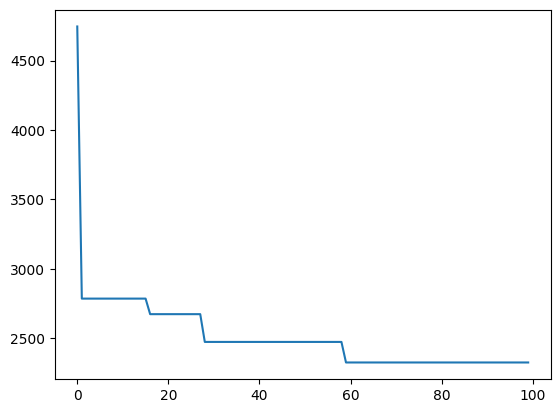

In [32]:
follow_best_distinct_fitness = follow_best_distinct_fitness_observer.fitness
plt.plot(iterations, follow_best_distinct_fitness)
plt.show()

## Repel Worst Gravity

In [33]:
from repel_worst_gravity import RepelWorstGravity

In [34]:
repel_worst_fitness_observer = FitnessObserver()
run_genetic_algorithm(RepelWorstGravity, 0.5, observers=[repel_worst_fitness_observer])

[2024-05-31 18:37:59,977] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-31 18:37:59,982] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-31 18:38:00,011] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-31 18:38:00,017] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-31 18:38:02,480] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 2438
Computing time: 2.503544807434082


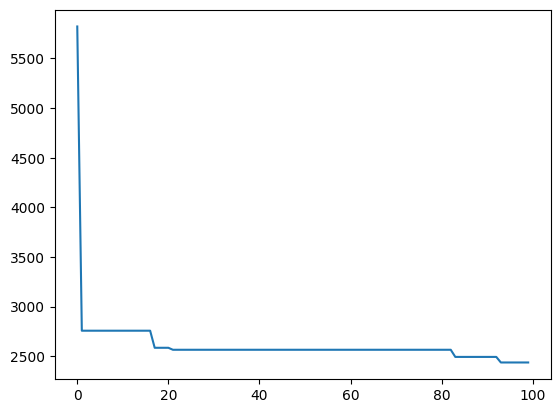

In [35]:
repel_worst_fitness = repel_worst_fitness_observer.fitness
plt.plot(iterations, repel_worst_fitness)
plt.show()

## Repel Worst Gravity Multistep

In [36]:
from repel_worst_gravity_multistep import RepelWorstGravityMultistep

In [37]:
repel_worst_multistep_fitness_observer = FitnessObserver()
run_genetic_algorithm(RepelWorstGravityMultistep, 0.5, observers=[repel_worst_multistep_fitness_observer])

[2024-05-31 18:38:02,617] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-31 18:38:02,623] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-31 18:38:02,642] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-31 18:38:02,642] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-31 18:38:05,361] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 2442
Computing time: 2.743911027908325


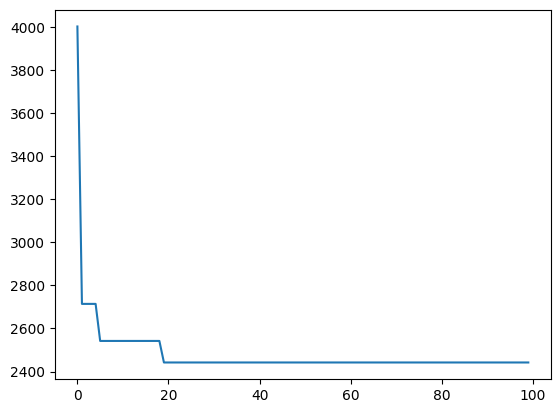

In [38]:
repel_worst_multistep_fitness = repel_worst_multistep_fitness_observer.fitness
plt.plot(iterations, repel_worst_multistep_fitness)
plt.show()

## Comparison

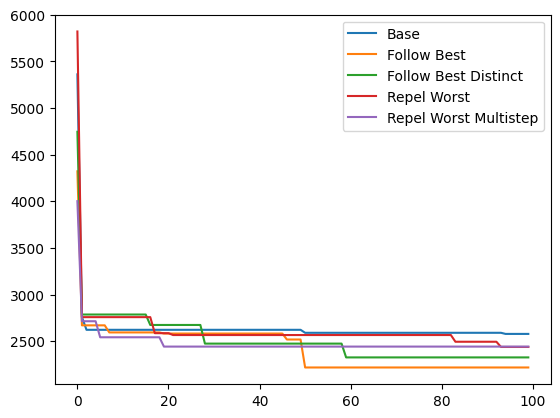

In [39]:
plt.plot(iterations, base_fitness, label="Base")
plt.plot(iterations, follow_best_fitness, label="Follow Best")
plt.plot(iterations, follow_best_distinct_fitness, label="Follow Best Distinct")
plt.plot(iterations, repel_worst_fitness, label="Repel Worst")
plt.plot(iterations, repel_worst_multistep_fitness, label="Repel Worst Multistep")
plt.legend()
plt.show()